In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [2]:
df=pd.read_csv("D://Tree Data C2E clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
Tree ID         42 non-null int64
Tree Species    42 non-null object
4/29/2016       42 non-null int64
10/20/2016      40 non-null float64
4/10/2017       42 non-null float64
9/11/2017       41 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.head()

,Tree ID,Tree Species,4/29/2016,10/20/2016,4/10/2017,9/11/2017
0,1,Screwbean Mesquite/Ironwood,42,40.0,36.0,NaN
1,2,Netleaf Hackberry,29,83.0,85.0,61.0
2,3,Screwbean Mesquite,45,107.0,120.0,98.5
3,4,Catclaw Acacia,46,NaN,80.0,66.5
4,5,Desert Willow,39,78.0,80.0,90.0


In [5]:
melted=df.melt(id_vars=['Tree ID','Tree Species'],value_vars=['4/29/2016','10/20/2016','4/10/2017','9/11/2017'],var_name='Date',value_name='Height')
melted

,Tree ID,Tree Species,Date,Height
0,1,Screwbean Mesquite/Ironwood,4/29/2016,42.0
1,2,Netleaf Hackberry,4/29/2016,29.0
2,3,Screwbean Mesquite,4/29/2016,45.0
3,4,Catclaw Acacia,4/29/2016,46.0
4,5,Desert Willow,4/29/2016,39.0
...,...,...,...,...
163,38,Screwbean Mesquite,9/11/2017,77.0
164,39,Canyon Hackberry,9/11/2017,88.0
165,40,Desert Hackberry,9/11/2017,254.0
166,41,Desert Hackberry,9/11/2017,24.0


In [6]:
species=df.groupby('Tree Species').mean()

In [7]:
species=species.reset_index()

In [8]:
species=species.drop('Tree ID',axis=1)

In [9]:

species

,Tree Species,4/29/2016,10/20/2016,4/10/2017,9/11/2017
0,Blue Palo Verde,33.250000,69.750000,67.000000,109.000000
1,Canyon Hackberry,43.000000,83.000000,95.000000,88.000000
2,Catclaw Acacia,49.166667,66.875000,59.416667,67.750000
3,Desert Hackberry,36.333333,32.833333,29.666667,100.666667
4,Desert Willow,41.500000,77.000000,77.000000,84.750000
5,Foothills Palo Verde,35.000000,48.500000,49.750000,72.500000
6,Netleaf Hackberry,29.000000,83.000000,85.000000,61.000000
7,Screwbean Mesquite,40.800000,86.400000,91.600000,99.900000
8,Screwbean Mesquite/Ironwood,42.000000,40.000000,36.000000,NaN
9,Sweet Acacia,54.000000,87.500000,88.250000,109.500000


In [10]:
sp_melt=species.melt(id_vars=['Tree Species'],value_vars=['4/29/2016','10/20/2016','4/10/2017','9/11/2017'],var_name='Date',value_name='Height')
sp_melt

,Tree Species,Date,Height
0,Blue Palo Verde,4/29/2016,33.250000
1,Canyon Hackberry,4/29/2016,43.000000
2,Catclaw Acacia,4/29/2016,49.166667
3,Desert Hackberry,4/29/2016,36.333333
4,Desert Willow,4/29/2016,41.500000
5,Foothills Palo Verde,4/29/2016,35.000000
6,Netleaf Hackberry,4/29/2016,29.000000
7,Screwbean Mesquite,4/29/2016,40.800000
8,Screwbean Mesquite/Ironwood,4/29/2016,42.000000
9,Sweet Acacia,4/29/2016,54.000000


In [11]:
sp_melt['Date']=pd.to_datetime(sp_melt['Date'])

In [12]:
stdate=sp_melt['Date'].iloc[0]

In [13]:
sp_melt['Days']=(sp_melt['Date']-stdate).dt.days

In [14]:
sp_list=np.unique(sp_melt['Tree Species'])
sp_list=[sp for sp in sp_list if sp!='Screwbean Mesquite/Ironwood']
sp_list
#plt_list=[]

['Blue Palo Verde',
 'Canyon Hackberry',
 'Catclaw Acacia',
 'Desert Hackberry',
 'Desert Willow',
 'Foothills Palo Verde',
 'Netleaf Hackberry',
 'Screwbean Mesquite',
 'Sweet Acacia',
 'Velvet Mesquite',
 'Whitethorn Acacia']

In [15]:
mask=sp_melt['Tree Species']==sp_list[0]
bpv=sp_melt[mask]
bpv

,Tree Species,Date,Height,Days
0,Blue Palo Verde,2016-04-29,33.25,0
12,Blue Palo Verde,2016-10-20,69.75,174
24,Blue Palo Verde,2017-04-10,67.00,346
36,Blue Palo Verde,2017-09-11,109.00,500


In [16]:
bpv_model = ols("Height ~ Days", data=bpv).fit()

In [17]:
bpv_model.summary()

C:\ProgramData\Anaconda3\envs\teach\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     12.86
Date:                Thu, 07 Nov 2019   Prob (F-statistic):             0.0697
Time:                        20:58:47   Log-Likelihood:                -14.824
No. Observations:                   4   AIC:                             33.65
Df Residuals:                       2   BIC:                             32.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.7113     11.772      3.034      0.094     -14.940      86.363
Days           0.1335      0.037      3.586      0.070      -0.027       0.294
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.345
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.416
Skew:                          -0.465   Prob(JB):                        0.812
Kurtosis:                       1.724   Cond. No.                         535.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
bpv_model.params

Intercept    35.711295
Days          0.133485
dtype: float64

In [19]:
xline=np.linspace(-100,700,100)
yline=bpv_model.params.Days*xline+bpv_model.params.Intercept

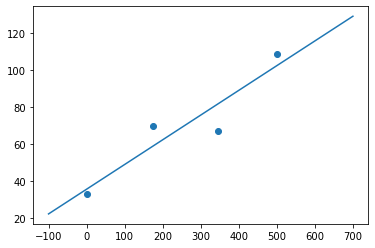

In [20]:
fig=plt.figure()
plt.scatter(bpv['Days'],bpv['Height'])
plt.plot(xline,yline)
plt.show()

In [21]:
reg=LinearRegression()

In [22]:
X=bpv['Days'].values.reshape(-1,1)
y=bpv['Height'].values.reshape(-1,1)

In [23]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
ysp=reg.predict(xline.reshape(-1,1))

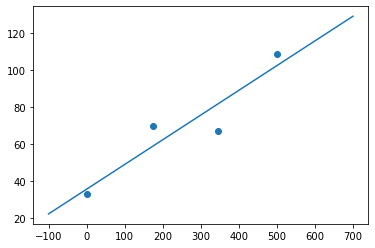

In [25]:
fig=plt.figure()
plt.scatter(bpv['Days'],bpv['Height'])
plt.plot(xline,ysp)
plt.show()

In [26]:
def sp_frame(sp):
    return sp_melt[sp_melt['Tree Species']==sp]
def regress(spdf):
    X=spdf['Days'].values.reshape(-1,1)
    y=spdf['Height'].values.reshape(-1,1)
    reg=LinearRegression()
    reg.fit(X,y)
    return reg

In [27]:
sp_regs={sp:{'frame':sp_frame(sp),'reg':regress(sp_frame(sp))} for sp in sp_list}

In [28]:
sp_regs

{'Blue Palo Verde': {'frame':        Tree Species       Date  Height  Days
  0   Blue Palo Verde 2016-04-29   33.25     0
  12  Blue Palo Verde 2016-10-20   69.75   174
  24  Blue Palo Verde 2017-04-10   67.00   346
  36  Blue Palo Verde 2017-09-11  109.00   500,
  'reg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)},
 'Canyon Hackberry': {'frame':         Tree Species       Date  Height  Days
  1   Canyon Hackberry 2016-04-29    43.0     0
  13  Canyon Hackberry 2016-10-20    83.0   174
  25  Canyon Hackberry 2017-04-10    95.0   346
  37  Canyon Hackberry 2017-09-11    88.0   500,
  'reg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)},
 'Catclaw Acacia': {'frame':       Tree Species       Date     Height  Days
  2   Catclaw Acacia 2016-04-29  49.166667     0
  14  Catclaw Acacia 2016-10-20  66.875000   174
  26  Catclaw Acacia 2017-04-10  59.416667   346
  38  Catclaw Acacia 2017-09-11  67.750000   500,
  'reg': Li

In [39]:
def response(change):
    sp=drop.value
    with fig.batch_update():
        fig.data[0].x=sp_regs[sp]['frame'].Days.values
        fig.data[0].y=sp_regs[sp]['frame'].Height.values
        

In [40]:
drop=widgets.Dropdown(options=sp_list)
scatter=go.Scatter(x=sp_regs['Blue Palo Verde']['frame'].Days.values,
                   y=sp_regs['Blue Palo Verde']['frame'].Height.values,mode='markers')
fig=go.FigureWidget(data=scatter)
drop.observe(response,names='value')
widgets.VBox([drop,fig])

In [93]:
sp_regs['Blue Palo Verde']['frame'].Height.values

array([ 33.25,  69.75,  67.  , 109.  ])

In [110]:
px.scatter(sp_melt,x='Days',y='Height',color='Tree Species',trendline='ols')

C:\ProgramData\Anaconda3\envs\teach\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



pandas.core.frame.DataFrame